In [1]:
import pandas as pd

In [2]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [3]:
data[1]

'a'

In [4]:
data[1:3]

3    b
5    c
dtype: object

In [5]:
data.loc[1]

'a'

In [6]:
data.loc[1:3]

1    a
3    b
dtype: object

In [7]:
data.iloc[1]

'b'

In [9]:
data.iloc[0]

'a'

In [10]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [11]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [13]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [14]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [16]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [17]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [21]:
f_u18.unstack(0)

,California,New York,Texas
2000,0.273594,0.247010,0.283251
2010,0.249211,0.222831,0.273568


In [22]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [24]:
import numpy as np

In [25]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  38.3  47.0  37.0  36.0  38.1
     2      38.0  36.9  31.0  37.6  57.0  37.5
2014 1      29.0  37.0  25.0  36.1  22.0  37.0
     2      24.0  36.4  19.0  36.4  31.0  38.1

In [26]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      47.0  37.0
     2      31.0  37.6
2014 1      25.0  36.1
     2      19.0  36.4

In [27]:
health_data.columns

MultiIndex(levels=[['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['subject', 'type'])

In [28]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      47.0  37.0
     2      31.0  37.6
2014 1      25.0  36.1
     2      19.0  36.4

In [29]:
health_data['Guido', 'HR']

year  visit
2013  1        47.0
      2        31.0
2014  1        25.0
      2        19.0
Name: (Guido, HR), dtype: float64

In [30]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.660927
      2      0.281228
c     1      0.987641
      2      0.644029
b     1      0.563439
      2      0.947173
dtype: float64

In [31]:
data = data.sort_index()
data

char  int
a     1      0.660927
      2      0.281228
b     1      0.563439
      2      0.947173
c     1      0.987641
      2      0.644029
dtype: float64

In [32]:
pop.unstack(level=0)

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [33]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [34]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [35]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [36]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [37]:
ser.sum()

2.811925491708157

In [38]:
ser.describe()

count    5.000000
mean     0.562385
std      0.308748
min      0.156019
25%      0.374540
50%      0.598658
75%      0.731994
max      0.950714
dtype: float64

In [39]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [40]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [41]:
planets.groupby('method')

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
titanic = sns.load_dataset('titanic')

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [51]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [52]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [55]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [56]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [61]:
titanic.pivot_table(
     'survived',
    index='sex',
    columns='class',
    margins=True
)   

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [64]:
titanic.pivot_table(
     'survived',
    index=['sex', age],
    columns='class',
#     margins=True
)   

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [65]:
births = pd.read_csv('data/births.csv')

In [66]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [75]:
births['decade'] = 10 * (births.year // 10)
births.pivot_table('births', index='decade', columns=
                  'gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [76]:
%matplotlib inline

In [77]:
import matplotlib.pyplot as plt

In [78]:
sns.set()

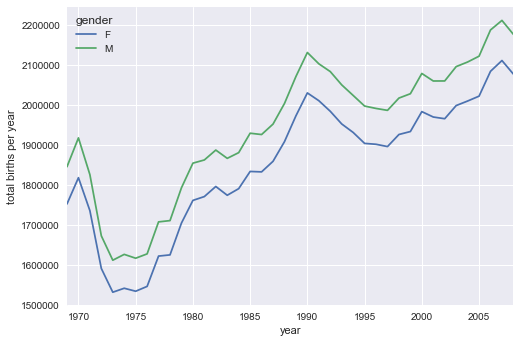

In [79]:
births.pivot_table(
    'births',
    index='year',
    columns='gender',
    aggfunc='sum'
).plot()
plt.ylabel('total births per year');

In [80]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([ 4358. ,  4814. ,  5289.5])

In [81]:
mu = quartiles[1]
sig = 0.74 * (quartiles[2]- quartiles[0])

In [82]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [84]:
births['day'] = births['day'].astype(int)

In [86]:
births.index = pd.to_datetime(
    10000 * births.year + 100 * births.month + births.day, format='%Y%m%d'

)

In [87]:
births['dayofweek'] = births.index.dayofweek

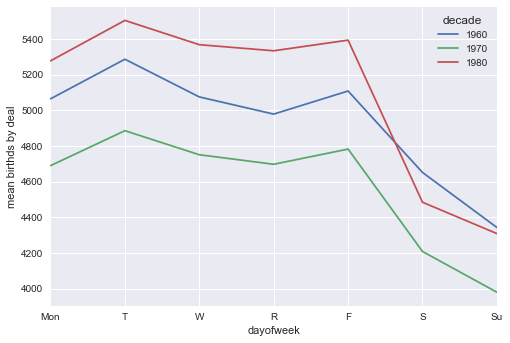

In [89]:
births.pivot_table('births', index='dayofweek', columns='decade',
                  aggfunc='mean'
                  ).plot()
plt.gca().set_xticklabels(['Mon', 'T', 'W', 'R', 'F', 'S', 'Su'])
plt.ylabel('mean birthds by deal')


In [91]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [95]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


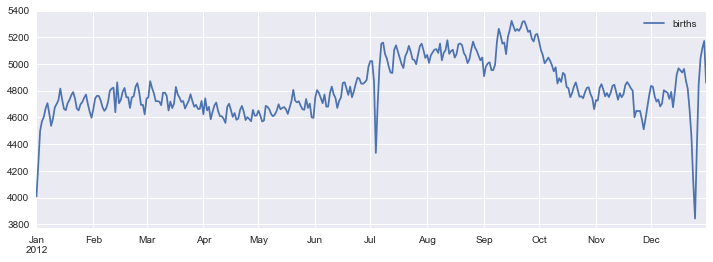

In [96]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [97]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [98]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [102]:
monte.str.extract('([A-Za-z]+)', expand=False)

0    G
1    J
2    T
3    E
4    T
5    M
dtype: object

In [105]:
monte.str.findall(r'^([^a].*)[^aeiou]$')

0    [Graham Chapma]
1                 []
2     [Terry Gillia]
3                 []
4       [Terry Jone]
5     [Michael Pali]
dtype: object

In [106]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [109]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [110]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [112]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [113]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [114]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [115]:
date.strftime('%A')

'Saturday'

In [116]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [117]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [118]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [119]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [120]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [125]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

In [123]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [126]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [127]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [128]:
pd.period_range('2015-07-01', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [129]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [134]:
pd.timedelta_range(0, periods=10, freq='S')

TimedeltaIndex(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04',
                '00:00:05', '00:00:06', '00:00:07', '00:00:08', '00:00:09'],
               dtype='timedelta64[ns]', freq='S')

In [135]:
pd.timedelta_range(0, periods=10, freq='T')

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00',
                '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
               dtype='timedelta64[ns]', freq='T')

In [136]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

ModuleNotFoundError: No module named 'pandas_datareader'